In [50]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set_style('whitegrid') 
from IPython.display import display
from IPython.core.pylabtools import getfigs

In [8]:
%matplotlib qt

In [3]:
saveas_path = '/Users/jamie/insight_data/figures/'

In [4]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [5]:
np.array(X_df.columns)

array(['Goal', 'Campaign_days', 'Title_n_words', 'Blurb_n_words',
       'Has_video', 'N_rewards', 'Min_reward', 'Median_reward',
       'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs',
       'Body_n_words', 'N_creator_backed', 'N_creator_created', 'art',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food',
       'games', 'journalism', 'music', 'photography', 'publishing',
       'technology', 'theater', 'Ships_intn', 'Mon', 'Tue', 'Wed', 'Thu',
       'Fri', 'Sat', 'Sun'], dtype=object)

In [6]:
np.shape(X_df)

(115196, 38)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=5)

In [18]:
pca.fit(X_df)

PCA(copy=True, n_components=5, whiten=False)

In [19]:
print pca.explained_variance_ratio_

[  9.99979408e-01   1.94427802e-05   8.73297487e-07   2.15051872e-07
   2.97694922e-08]


In [21]:
print pca.explained_variance_ 

[  4.96450260e+11   9.65257205e+06   4.33557693e+05   1.06764756e+05
   1.47793765e+04]


In [46]:
# get feature importances from the first pc
feature_importances = pca.components_[1,:]
print feature_importances

[  2.53201934e-04  -3.38761329e-04  -3.31254652e-05  -3.34863812e-05
  -2.28596831e-05  -8.15469854e-04  -2.84028145e-03  -2.86223053e-02
  -9.97720375e-01  -7.85591883e-03  -3.09917544e-04  -4.26789673e-04
  -6.05301732e-02  -6.03725291e-05   5.74109272e-05   3.48768869e-06
   2.11975531e-06   2.38516363e-06   9.07549356e-07   4.43772085e-06
   3.92066942e-06  -2.66095661e-05  -6.03287955e-07  -1.36689452e-06
   3.78227491e-07   1.98256435e-06   2.25379463e-06   8.09502151e-06
  -2.40902068e-06   1.02061403e-06  -1.45590621e-05   4.12638560e-07
   1.79792988e-07  -4.74315224e-08  -5.15543667e-08   1.18198861e-07
  -2.42239727e-07  -3.69404792e-07]


In [52]:
pca.mean_

array([  3.14743762e+04,   3.25858450e+01,   5.72912254e+00,
         1.92026199e+01,   7.86190493e-01,   8.91223654e+00,
         1.60048960e+01,   1.15209547e+02,   2.11692187e+03,
         1.26199130e+02,   2.55417723e+00,   5.01296920e+00,
         7.58382192e+02,   5.28553075e+00,   1.70350533e+00,
         7.72162228e-02,   2.84558492e-02,   1.63026494e-02,
         1.20403486e-02,   6.53060870e-02,   5.15556096e-02,
         1.89633321e-01,   6.84919615e-02,   7.91260113e-02,
         7.88221813e-03,   1.70891350e-01,   2.95496371e-02,
         1.21653530e-01,   4.90294802e-02,   3.28657245e-02,
         4.96926977e-01,   1.93322685e-01,   2.00883711e-01,
         1.80709400e-01,   1.67297476e-01,   1.59076704e-01,
         5.65644640e-02,   4.21455606e-02])

In [47]:
n_top = len(feature_importances)
X_cols = np.array(X_cols)
print X_cols

['Goal' 'Campaign_days' 'Title_n_words' 'Blurb_n_words' 'Has_video'
 'N_rewards' 'Min_reward' 'Median_reward' 'Max_reward' 'Reward_ship_days'
 'N_links' 'N_figs' 'Body_n_words' 'N_creator_backed' 'N_creator_created'
 'art' 'comics' 'crafts' 'dance' 'design' 'fashion' 'film' 'food' 'games'
 'journalism' 'music' 'photography' 'publishing' 'technology' 'theater'
 'Ships_intn' 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun']


In [56]:
fig = plt.figure(figsize=(5*1.618,5))
feature_importance_is = np.argsort(feature_importances)
feature_importance_is_decending = feature_importance_is[-1::-1]
plt.title("Features with maximum variance")
plt.bar(range(n_top), feature_importances[feature_importance_is_decending[0:n_top]],
       color="b", align="center")
plt.xticks(range(n_top), X_cols[feature_importance_is_decending[0:n_top]],rotation='vertical')
plt.xlim([-1, n_top])
plt.xlabel('Feature')
plt.ylabel('Feature importance for PC1 (Eigenvector)')

In [57]:
saveas_path = '/Users/jamie/insight_data/figures/'
plt.savefig(saveas_path + 'pca max variance.png',bbox_inches='tight',dpi=400) 

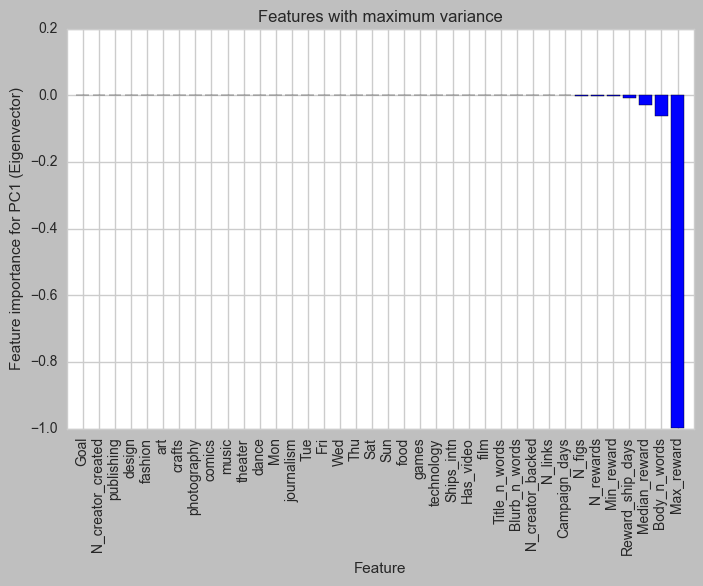

In [58]:
display(plt.gcf())